# Jupyter Notebook 5 - Notebook for creating datasets

---

# Notebook overview

I wanted a notebook to have a record of creating or using datasets for different parts of the project.

**List of datasets:**
   - 1) Preprocessed Day 1 split into 50:50:
        - Take Preprocessed Day 1 take and randomise and split into 50:50.
        - First half will be used to train the baseline models in AWS.
        - Second half will be used with Kafka in the Real Time part of the project.
   
   - 2) Combined Dataset split into 50:50: ids_2018
        - Take ids_2018 and randomise the split into 50:50
        - An even distribution of each label in each split.

---

In [14]:
# Libraries
import os
import pandas as pd

# Preprocessed Day 1 split into 50:50

In [15]:
# Location of preprocessed file
folder_path = r"C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Notebooks"
file_path = os.path.join(folder_path, "data_1_processed.parquet")

# load data
data_1_processed = pd.read_parquet(file_path, engine="pyarrow")

In [16]:
# Explore the head of the file.
# data_1_processed

file_size = data_1_processed.memory_usage(deep=True).sum()
print(f"Print size: {file_size /(1024*1024):.2f} MB")

Print size: 326.80 MB


In [17]:
# Randomise the data
randomise_data = data_1_processed.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
# Split and create two two files
half_length = len(randomise_data) // 2

data_1_processed_1_1 = randomise_data.iloc[:half_length] 
data_1_processed_1_2 = randomise_data.iloc[half_length:]

Now, I have two halves of the first day of data which will be used to train the baseline model on AWS and the Real Time Model using Kafka.

In [19]:
# Save to file
folder_path = r"C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Notebooks\Working data files from notebooks"

data_1_processed_1_1.to_parquet(os.path.join(folder_path, "data_1_processed_1_1.parquet"))
data_1_processed_1_2.to_parquet(os.path.join(folder_path, "data_1_processed_1_2.parquet"))

## File sizes and changes

In [20]:
file_path = 'C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Notebooks/data_1_processed.parquet'
file_size= os.path.getsize(file_path)
file_size_kb = file_size / 1024
file_size_mb = file_size_kb / 1024

file_size, file_size_kb, file_size_mb

(70485080, 68833.0859375, 67.21981048583984)

In [21]:
file_path = 'C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Notebooks/Working data files from notebooks/data_1_processed_1_1.parquet'
file_size= os.path.getsize(file_path)
file_size_kb = file_size / 1024
file_size_mb = file_size_kb / 1024

file_size, file_size_kb, file_size_mb

(42260319, 41269.8427734375, 40.30258083343506)

In [22]:
file_path = 'C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Notebooks/Working data files from notebooks/data_1_processed_1_2.parquet'
file_size= os.path.getsize(file_path)
file_size_kb = file_size / 1024
file_size_mb = file_size_kb / 1024

file_size, file_size_kb, file_size_mb

(42815319, 41811.8349609375, 40.83187007904053)

## Save file to csv

In [23]:
# Now save the DataFrame to a CSV file
data_1_processed_1_1.to_csv('data_1_processed_1_1.csv', index=False)

# Combined Dataset split into 50:50

In [24]:
# Location of preprocessed file
folder_path = r"C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Notebooks"
file_path = os.path.join(folder_path, "ids_2018.parquet")

# load data
data = pd.read_parquet(file_path, engine="pyarrow")

In [25]:
data.shape[0]

16137183

Split the data in 50%, make sure 50% of the label 1 (the attack labels) are in each split.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data_1, data_2 = train_test_split(data, test_size=0.5, random_state=42, stratify=data["Label"])

In [28]:
data_1.shape[0], data_2.shape[0]

(8068591, 8068592)

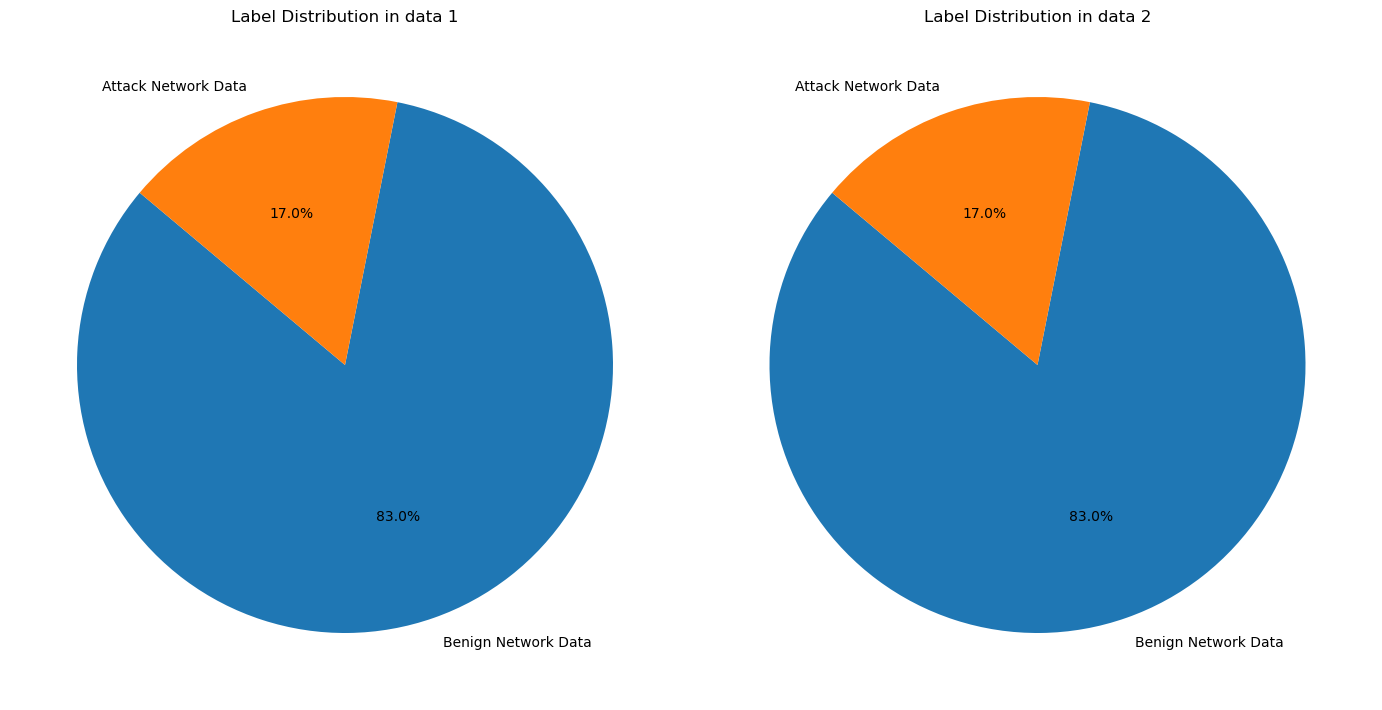

In [29]:
import matplotlib.pyplot as plt

# change the lables 1, 0 to display what they are
data_1['Label'] = data_1["Label"].replace({0:"Benign Network Data", 1:"Attack Network Data"})
data_2['Label'] = data_2["Label"].replace({0:"Benign Network Data", 1:"Attack Network Data"})

#Piechart for each dataset
label_counts_1 = data_1['Label'].value_counts()
label_counts_2 = data_2['Label'].value_counts()

fig, ax =plt.subplots(1,2, figsize=(14,7))

ax[0].pie(label_counts_1, labels=label_counts_1.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title("Label Distribution in data 1")

ax[1].pie(label_counts_2, labels=label_counts_2.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title("Label Distribution in data 2")


plt.tight_layout()
plt.show()

In [30]:
# save the lables 1, 0 back
data_1['Label'] = data_1['Label'].replace({"Benign Network Data": 0, "Attack Network Data": 1})
data_2['Label'] = data_2['Label'].replace({"Benign Network Data": 0, "Attack Network Data": 1})

In [31]:
# Save datasets
data_1.to_parquet('ids_2018_baseline_data.parquet')
data_2.to_parquet('ids_2018_streaming_data.parquet')

In [32]:
# Get file sizes
folder_path = r"C:\Users\Kolobane\OneDrive\CIT MSc Data Science Modules\_Semester Three - Final Project\Project Two - Network Project\Notebooks"

baseline_file = os.path.join(folder_path, 'ids_2018_baseline_data.parquet')
stream_file = os.path.join(folder_path, 'ids_2018_streaming_data.parquet')

baseline_size = os.path.getsize(baseline_file)
stream_size = os.path.getsize(stream_file)

print(f"Baseline data file size: {baseline_size} bytes")
print(f"Stream data file size: {stream_size} bytes")

Baseline data file size: 967215888 bytes
Stream data file size: 971577902 bytes


---

In [33]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068591 entries, 873164 to 754509
Data columns (total 71 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float32
 1   Protocol           float32
 2   Flow Duration      float32
 3   Tot Fwd Pkts       float32
 4   Tot Bwd Pkts       float32
 5   TotLen Fwd Pkts    float32
 6   TotLen Bwd Pkts    float32
 7   Fwd Pkt Len Max    float32
 8   Fwd Pkt Len Min    float32
 9   Fwd Pkt Len Mean   float32
 10  Fwd Pkt Len Std    float32
 11  Bwd Pkt Len Max    float32
 12  Bwd Pkt Len Min    float32
 13  Bwd Pkt Len Mean   float32
 14  Bwd Pkt Len Std    float32
 15  Flow Byts/s        float32
 16  Flow Pkts/s        float32
 17  Flow IAT Mean      float32
 18  Flow IAT Std       float32
 19  Flow IAT Max       float32
 20  Flow IAT Min       float32
 21  Fwd IAT Tot        float32
 22  Fwd IAT Mean       float32
 23  Fwd IAT Std        float32
 24  Fwd IAT Max        float32
 25  Fwd IAT Min   

---

In [34]:
print("Code runs completely")

Code runs completely
